In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

In [4]:
# loading checkpoint1
check_point1_df = pd.read_csv('checkPoint1.csv')

In [5]:
check_point1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484743 entries, 0 to 5484742
Data columns (total 21 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   city                     object 
 2   state                    object 
 3   property_type            object 
 4   median_sale_price        float64
 5   median_list_price        float64
 6   median_ppsf              float64
 7   median_list_ppsf         float64
 8   homes_sold               float64
 9   pending_sales            float64
 10  new_listings             float64
 11  inventory                float64
 12  months_of_supply         float64
 13  median_dom               float64
 14  avg_sale_to_list         float64
 15  sold_above_list          float64
 16  price_drops              float64
 17  off_market_in_two_weeks  float64
 18  parent_metro_region      object 
 19  year                     int64  
 20  month                    int64  
dtypes: float

In [6]:
# drop the unnamed column
copy1 = check_point1_df.drop(columns=['Unnamed: 0'])

In [7]:
copy1.head()

,city,state,property_type,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,year,month
0,Surfside,Florida,Single Family Residential,375000.0,512500.000000,255.681818,314.471653,3.0,2.000000,24.932991,118.127451,17.0,187.31543,0.934025,0.000000,0.002764,0.000000,"Miami, FL",2012,1
1,Stratford,California,Single Family Residential,80000.0,441723.893881,66.555740,228.896179,1.0,1.000000,30.154512,1.000000,1.0,49.00000,1.032258,1.000000,0.254871,0.000000,"Hanford, CA",2012,1
2,Massapequa Park,New York,All Residential,413000.0,399000.000000,266.451613,284.371195,9.0,4.000000,11.000000,62.000000,6.9,105.00000,0.978421,0.111111,0.322581,0.250000,"Nassau County, NY",2012,1
3,San Miguel,California,All Residential,139000.0,240000.000000,131.132075,152.963671,3.0,1.000000,3.000000,19.000000,6.3,169.00000,0.902366,0.000000,0.246345,0.000000,"San Luis Obispo, CA",2012,1
4,East Bloomfield,New York,Single Family Residential,85000.0,108000.000000,151.785714,88.815789,1.0,4.127396,3.000000,33.000000,33.0,118.00000,0.945495,0.000000,0.176484,0.119002,"Rochester, NY",2012,1


In [8]:
copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484743 entries, 0 to 5484742
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   city                     object 
 1   state                    object 
 2   property_type            object 
 3   median_sale_price        float64
 4   median_list_price        float64
 5   median_ppsf              float64
 6   median_list_ppsf         float64
 7   homes_sold               float64
 8   pending_sales            float64
 9   new_listings             float64
 10  inventory                float64
 11  months_of_supply         float64
 12  median_dom               float64
 13  avg_sale_to_list         float64
 14  sold_above_list          float64
 15  price_drops              float64
 16  off_market_in_two_weeks  float64
 17  parent_metro_region      object 
 18  year                     int64  
 19  month                    int64  
dtypes: float64(14), int64(2), object(4)
memory usa

In [9]:
copy1.isna().sum()

city                       0
state                      0
property_type              0
median_sale_price          0
median_list_price          0
median_ppsf                0
median_list_ppsf           0
homes_sold                 0
pending_sales              0
new_listings               0
inventory                  0
months_of_supply           0
median_dom                 0
avg_sale_to_list           0
sold_above_list            0
price_drops                0
off_market_in_two_weeks    0
parent_metro_region        0
year                       0
month                      0
dtype: int64

In [10]:
copy1.sample(10)

,city,state,property_type,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,year,month
3515057,Webster,New York,All Residential,180450.0,1.299000e+05,110.992170,117.663043,8.0,7.000000,1.000000,8.0,1.0,8.0,1.019453,0.625000,0.125000,0.142857,"Rochester, NY",2020,4
2136621,Mercer Island,Washington,All Residential,1622500.0,1.295000e+06,486.640386,532.327586,42.0,47.000000,63.000000,67.0,1.6,8.0,1.010764,0.309524,0.238806,0.680851,"Seattle, WA",2017,5
6197,Oceanside,California,Condo/Co-op,149000.0,2.949000e+05,164.705882,177.066667,27.0,26.000000,41.000000,124.0,4.6,106.0,0.965718,0.074074,0.258065,0.307692,"San Diego, CA",2012,1
834739,Piney,Arkansas,Single Family Residential,79500.0,1.695000e+05,48.416565,80.056250,1.0,10.200565,4.000000,20.0,20.0,222.0,0.888268,0.000000,0.229881,0.176888,"Hot Springs, AR",2014,5
2391328,Foster,Rhode Island,Single Family Residential,284950.0,3.599000e+05,155.170455,136.487406,8.0,1.000000,5.000000,21.0,2.6,97.0,0.999163,0.375000,0.198114,0.000000,"Providence, RI",2017,11
3888868,Flagler Estates,Florida,All Residential,300000.0,2.399500e+05,162.866450,183.213050,1.0,2.000000,2.000000,4.0,4.0,28.0,1.052632,1.000000,0.229577,0.500000,"Jacksonville, FL",2021,2
3140105,Bellmawr,New Jersey,Single Family Residential,174900.0,1.635000e+05,117.493572,114.583333,16.0,13.000000,23.000000,56.0,3.5,42.0,0.977660,0.000000,0.285714,0.153846,"Camden, NJ",2019,7
1024484,Livingston,Tennessee,Single Family Residential,65000.0,1.499000e+05,42.273463,75.197314,2.0,1.000000,4.000000,16.0,8.0,467.0,0.963303,0.000000,0.056761,0.000000,"Cookeville, TN",2014,10
546684,Hudson Bend,Texas,Single Family Residential,387500.0,2.799000e+05,179.115463,155.093313,2.0,1.000000,5.000000,33.0,16.5,117.0,0.907192,0.000000,0.242424,0.000000,"Austin, TX",2013,7
2812060,Ossineke,Michigan,All Residential,48000.0,1.813599e+05,26.315789,112.136300,1.0,16.379402,20.946813,7.0,7.0,347.0,0.941176,0.000000,0.307659,0.340309,"Alpena, MI",2018,10


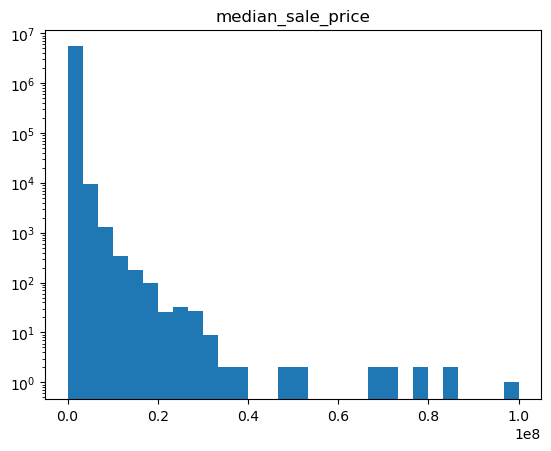

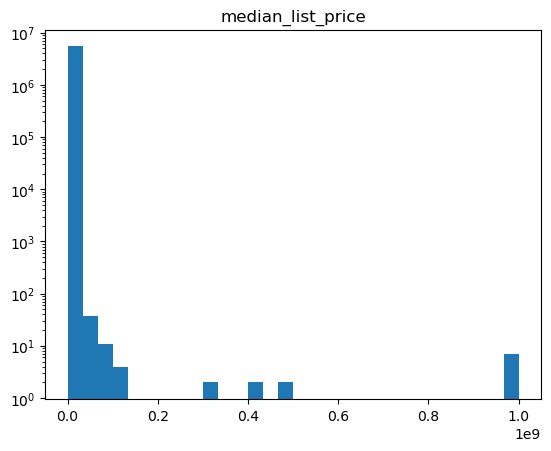

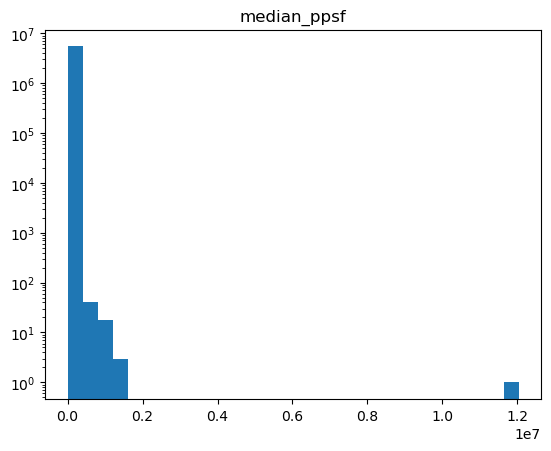

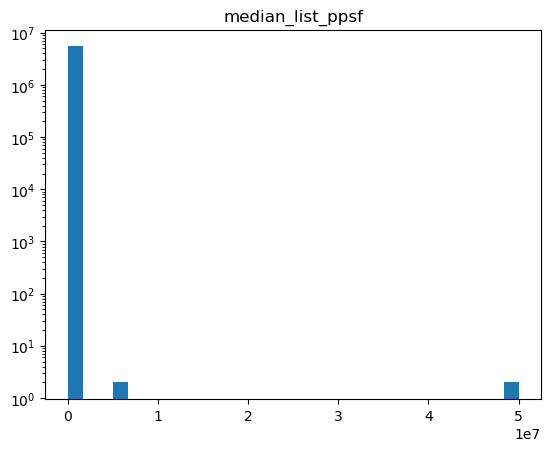

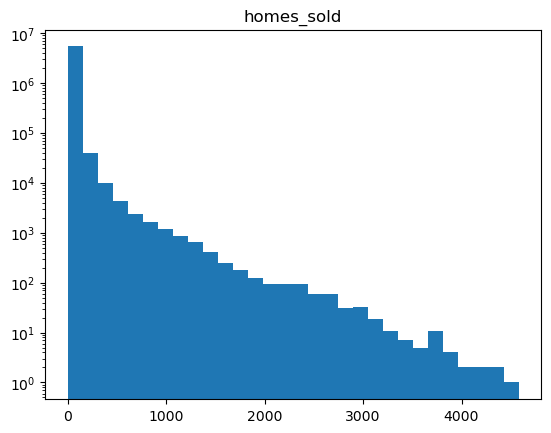

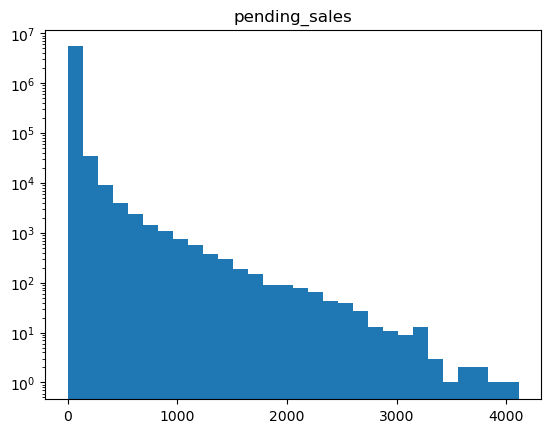

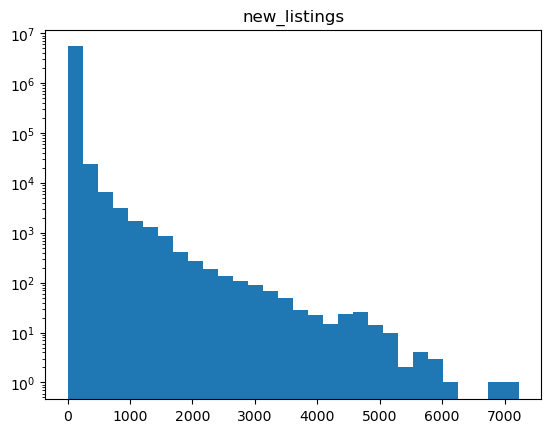

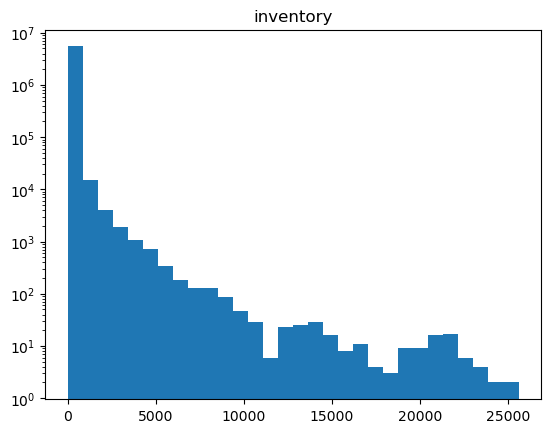

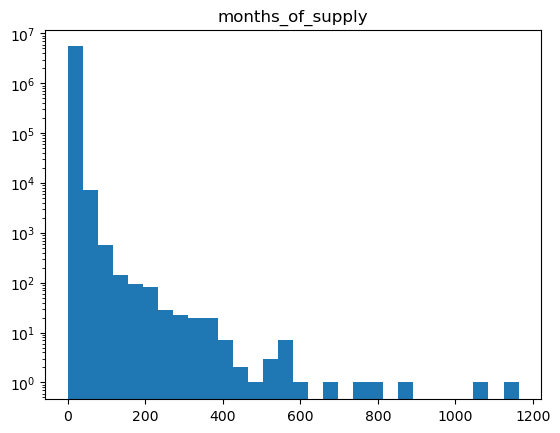

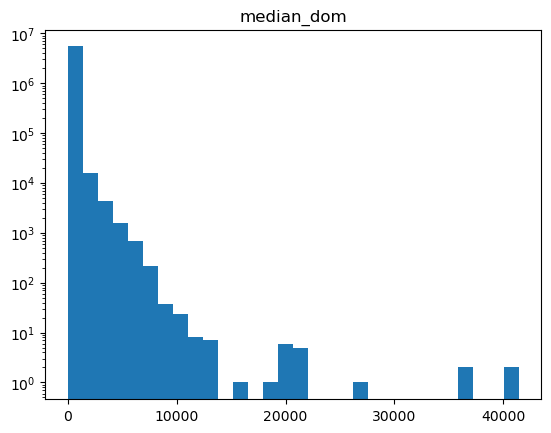

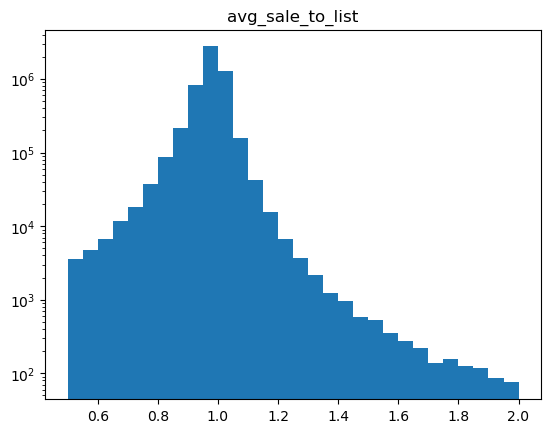

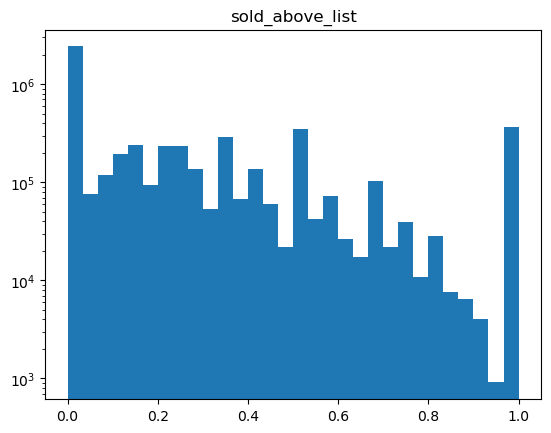

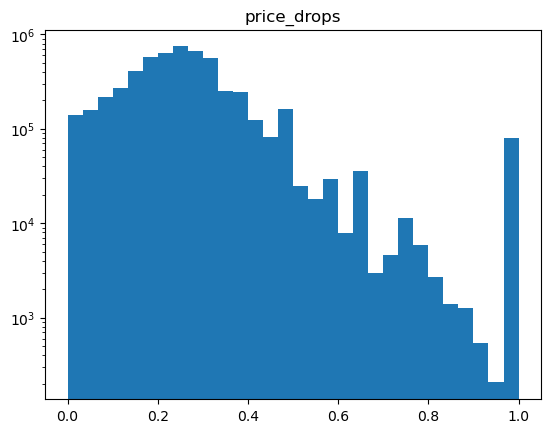

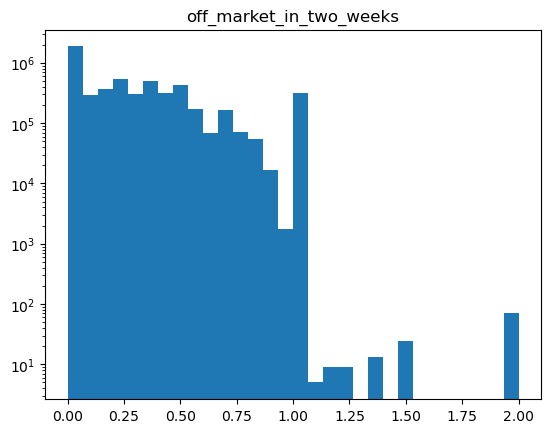

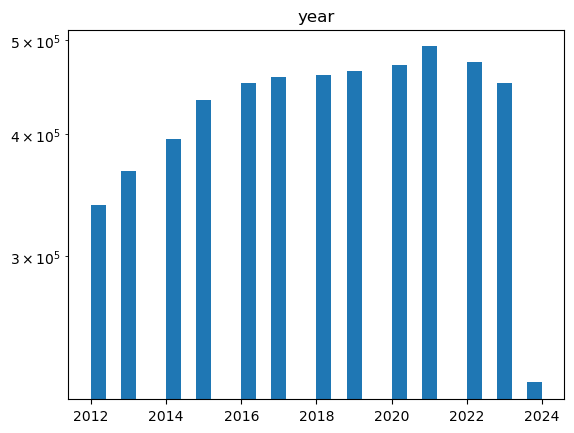

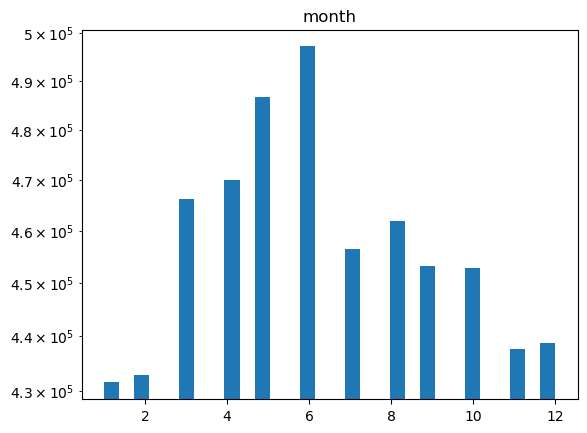

In [11]:
for col in copy1.select_dtypes('number').columns:
    plt.figure()
    plt.hist(copy1[col], log=True, bins=30)
    plt.title(col)
    plt.show()

In [12]:
copy1.describe()

,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,year,month
count,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06
mean,3.101317e+05,3.418722e+05,1.903836e+02,2.120553e+02,1.464499e+01,1.397302e+01,1.964265e+01,4.715140e+01,4.189325e+00,1.000290e+02,9.734046e-01,2.315278e-01,2.650589e-01,2.773611e-01,2.018047e+03,6.484383e+00
std,4.177742e+05,1.288952e+06,5.928607e+03,3.042591e+04,5.620837e+01,4.860098e+01,6.973297e+01,1.977835e+02,4.910369e+00,2.178838e+02,6.001909e-02,2.932667e-01,1.508116e-01,2.848178e-01,3.509792e+00,3.398437e+00
min,1.000000e+00,2.900000e+02,2.500000e-04,3.992174e-03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,5.000000e-01,0.000000e+00,1.090869e-04,0.000000e+00,2.012000e+03,1.000000e+00
25%,1.340000e+05,1.649500e+05,8.591045e+01,9.962929e+01,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,1.700000e+00,2.900000e+01,9.543815e-01,0.000000e+00,1.818182e-01,0.000000e+00,2.015000e+03,4.000000e+00
50%,2.199000e+05,2.517616e+05,1.292960e+02,1.421042e+02,4.000000e+00,5.000000e+00,7.000000e+00,1.500000e+01,3.000000e+00,5.900000e+01,9.798387e-01,1.250000e-01,2.500000e-01,2.222222e-01,2.018000e+03,6.000000e+00
75%,3.625000e+05,3.990000e+05,2.004061e+02,2.140078e+02,1.100000e+01,1.252127e+01,1.800000e+01,3.920478e+01,5.000000e+00,1.090000e+02,1.000000e+00,3.750000e-01,3.210559e-01,4.444444e-01,2.021000e+03,9.000000e+00
max,1.000000e+08,1.000000e+09,1.203300e+07,5.000000e+07,4.579000e+03,4.112000e+03,7.224000e+03,2.559200e+04,1.163000e+03,4.139100e+04,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.024000e+03,1.200000e+01


In [13]:
copy1['date'] = pd.to_datetime(copy1[['year', 'month']].assign(day=1))

In [14]:
copy1.head()

,city,state,property_type,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,...,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,year,month,date
0,Surfside,Florida,Single Family Residential,375000.0,512500.000000,255.681818,314.471653,3.0,2.000000,24.932991,...,17.0,187.31543,0.934025,0.000000,0.002764,0.000000,"Miami, FL",2012,1,2012-01-01
1,Stratford,California,Single Family Residential,80000.0,441723.893881,66.555740,228.896179,1.0,1.000000,30.154512,...,1.0,49.00000,1.032258,1.000000,0.254871,0.000000,"Hanford, CA",2012,1,2012-01-01
2,Massapequa Park,New York,All Residential,413000.0,399000.000000,266.451613,284.371195,9.0,4.000000,11.000000,...,6.9,105.00000,0.978421,0.111111,0.322581,0.250000,"Nassau County, NY",2012,1,2012-01-01
3,San Miguel,California,All Residential,139000.0,240000.000000,131.132075,152.963671,3.0,1.000000,3.000000,...,6.3,169.00000,0.902366,0.000000,0.246345,0.000000,"San Luis Obispo, CA",2012,1,2012-01-01
4,East Bloomfield,New York,Single Family Residential,85000.0,108000.000000,151.785714,88.815789,1.0,4.127396,3.000000,...,33.0,118.00000,0.945495,0.000000,0.176484,0.119002,"Rochester, NY",2012,1,2012-01-01


In [15]:
copy1.to_csv('checkpoint2.csv')

In [16]:
distinct_years = copy1['year'].unique()
distinct_years

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024])

In [17]:
# distinct cities in the year 2012
sorted(copy1.loc[(copy1['year'] == 2013), 'state'].unique())

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Columbia',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [18]:
len(copy1.loc[copy1['year'] == 2024])

222638

In [19]:
len(copy1)

5484743

In [20]:
222638/5484743

0.04059223923527502

In [21]:
# getting the political stance data
senate_composition_df = pd.read_json('senate_composition.json')
senate_composition_df.sample(3)


,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Michigan,democratic,democratic,democratic,democratic,democratic,democratic,democratic,democratic,democratic,democratic,democratic,democratic,democratic
Kansas,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican
Rhode Island,democratic,democratic,democratic,democratic,democratic,democratic,democratic,democratic,democratic,democratic,democratic,democratic,democratic


In [31]:
senate_composition_df[2012]['Michigan']

'democratic'

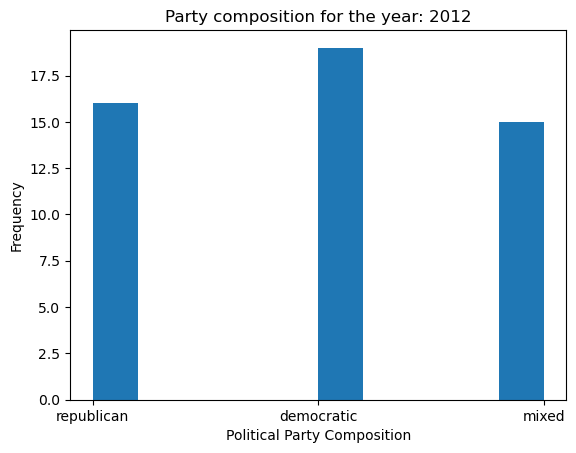

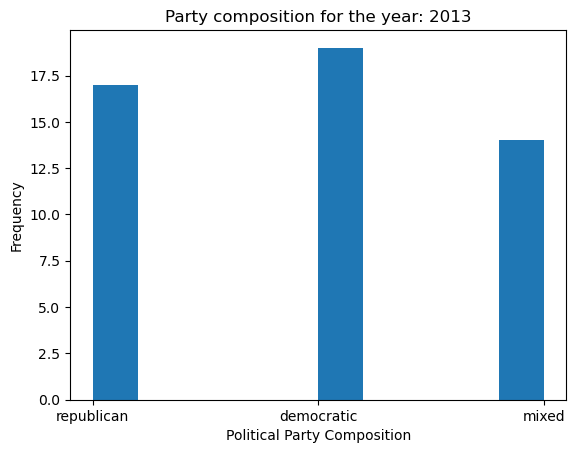

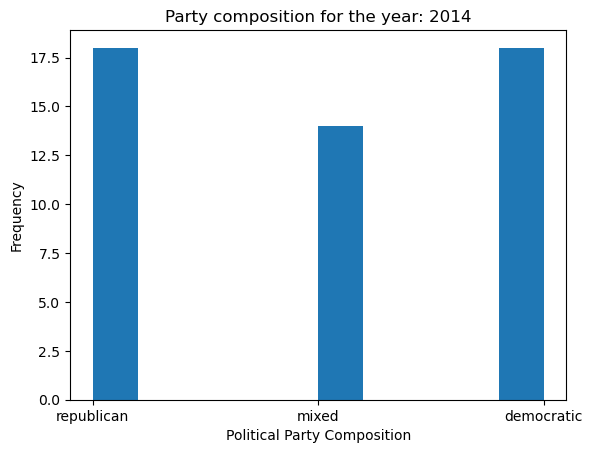

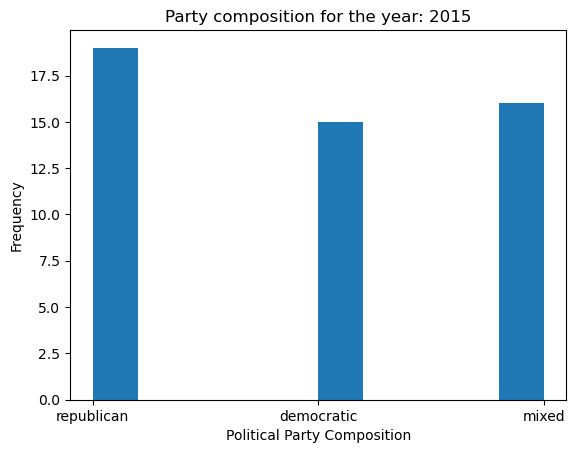

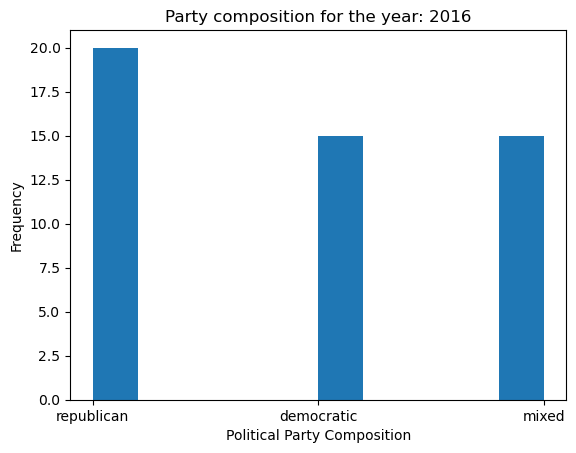

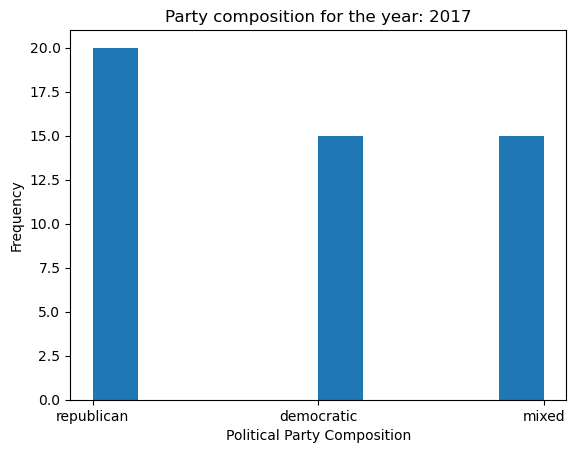

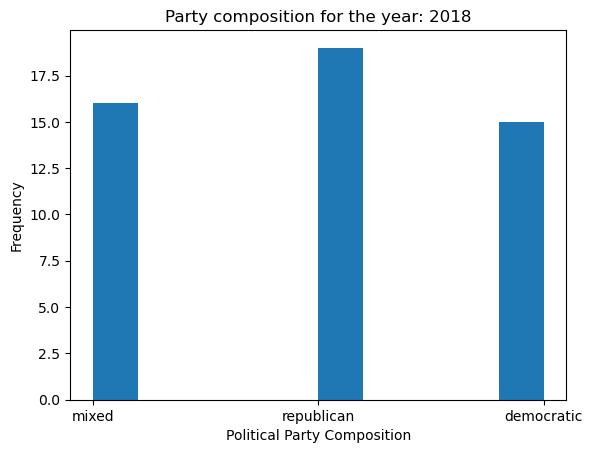

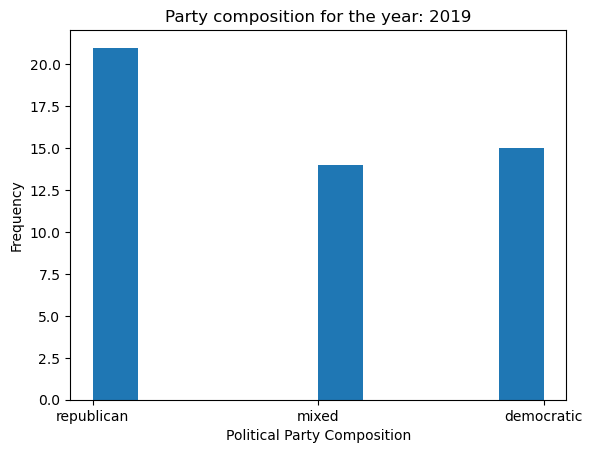

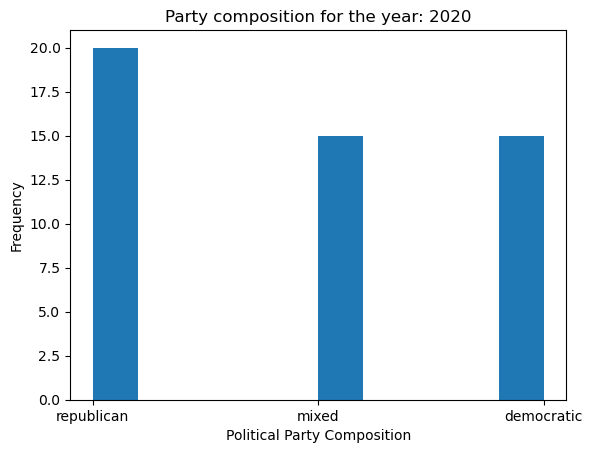

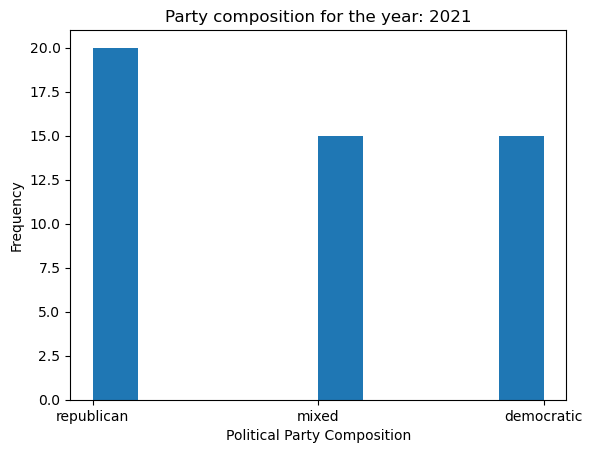

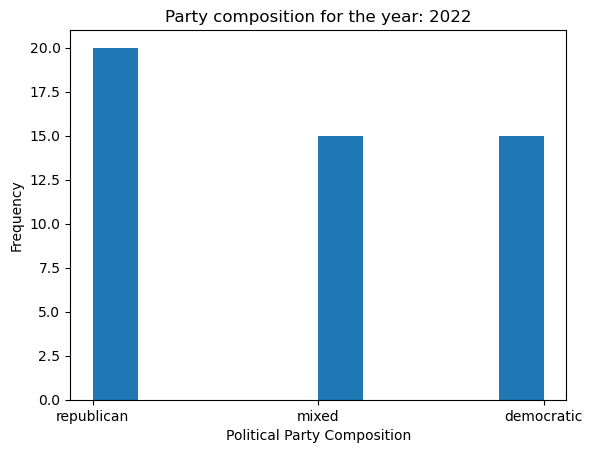

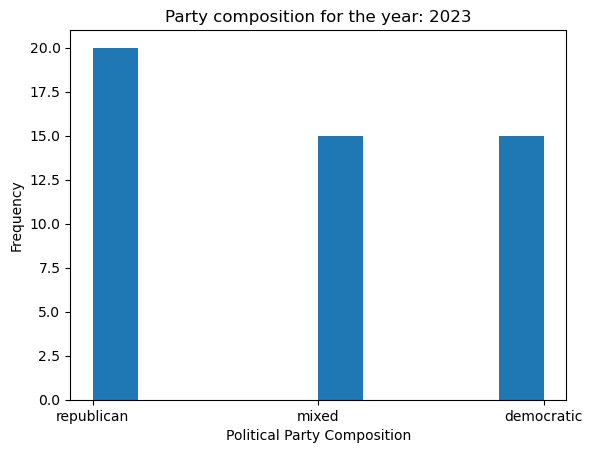

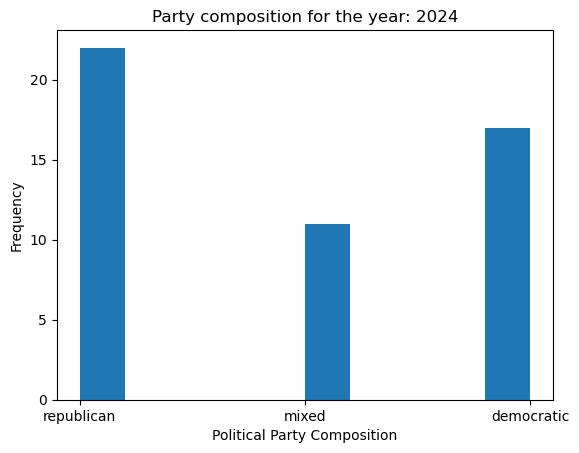

In [28]:
for col in senate_composition_df.columns:
    plt.figure()
    plt.hist(senate_composition_df[col])
    plt.xlabel('Political Party Composition')
    plt.ylabel('Frequency')
    plt.title(f'Party composition for the year: {col}')
    plt.show()

sel = copy1.loc[:, ['state', 'year']]
sel

In [54]:
# attempting to combine the dataframes
copy2  = copy1.copy(deep=True)
# get the needed columns from copy1
# look up the associated value in senate_composition_df
test = zip(copy2.loc[:, 'year'], copy2.loc[:, 'state'])
copy2['senate_political_stance'] = list(senate_composition_df[int(year)].get(state, None) for (year,state) in test)

In [55]:
copy2.head(3)

,city,state,property_type,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,...,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,year,month,date,senate_political_stance
0,Surfside,Florida,Single Family Residential,375000.0,512500.000000,255.681818,314.471653,3.0,2.0,24.932991,...,187.31543,0.934025,0.000000,0.002764,0.00,"Miami, FL",2012,1,2012-01-01,mixed
1,Stratford,California,Single Family Residential,80000.0,441723.893881,66.555740,228.896179,1.0,1.0,30.154512,...,49.00000,1.032258,1.000000,0.254871,0.00,"Hanford, CA",2012,1,2012-01-01,democratic
2,Massapequa Park,New York,All Residential,413000.0,399000.000000,266.451613,284.371195,9.0,4.0,11.000000,...,105.00000,0.978421,0.111111,0.322581,0.25,"Nassau County, NY",2012,1,2012-01-01,democratic


In [57]:
# drop the rows that Columbia as null political stance
copy2 = copy2.drop(copy2[copy2['state'] == 'Columbia'].index)

In [58]:
copy2.head(3)

,city,state,property_type,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,...,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,year,month,date,senate_political_stance
0,Surfside,Florida,Single Family Residential,375000.0,512500.000000,255.681818,314.471653,3.0,2.0,24.932991,...,187.31543,0.934025,0.000000,0.002764,0.00,"Miami, FL",2012,1,2012-01-01,mixed
1,Stratford,California,Single Family Residential,80000.0,441723.893881,66.555740,228.896179,1.0,1.0,30.154512,...,49.00000,1.032258,1.000000,0.254871,0.00,"Hanford, CA",2012,1,2012-01-01,democratic
2,Massapequa Park,New York,All Residential,413000.0,399000.000000,266.451613,284.371195,9.0,4.0,11.000000,...,105.00000,0.978421,0.111111,0.322581,0.25,"Nassau County, NY",2012,1,2012-01-01,democratic


In [59]:
copy2.to_csv('checkpoint3.csv')